In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
import geopandas as gpd


In [2]:
files = glob.glob('data/*.csv')
files

['data/census_pop_data_1870_1950.csv',
 'data/census_pop_data_1960_2010.csv',
 'data/pertussis_US_monthly_data.csv']

In [3]:
pertussis_monthly = pd.read_csv(files[2], header =0)
# print(pertussis_monthly.columns)
states_monthly= pertussis_monthly.columns[2:]
print(len(states_monthly))
colors = cm.RdYlGn(np.linspace(0,1,len(states_monthly)))

pertussis_monthly = pertussis_monthly.replace('-', np.nan)
pertussis_monthly = pertussis_monthly.astype('float')
pertussis_monthly['sum_states'] = pertussis_monthly[states_monthly].sum(axis = 1,skipna=True)
pertussis_monthly['mean_states'] = pertussis_monthly[states_monthly].mean(axis = 1,skipna=True)

pertussis_monthly['Time'] = pertussis_monthly['YEAR'] + pertussis_monthly['MONTH']/12
print(pertussis_monthly['Time'].min(), pertussis_monthly['Time'].max())

49
1951.0833333333333 2012.5833333333333


In [4]:
pertussis_monthly.head()

,YEAR,MONTH,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District.of.Columbia,...,Utah,Vermont,Virginia,Washington,West.Virginia,Wisconsin,Wyoming,sum_states,mean_states,Time
0,1951.0,1.0,132.0,251.0,124.0,256.0,117.0,105.0,19.0,23.0,...,6.0,250.0,330.0,116.0,152.0,335.0,12.0,7652.0,156.163265,1951.083333
1,1951.0,2.0,94.0,206.0,217.0,199.0,52.0,66.0,4.0,23.0,...,10.0,108.0,197.0,52.0,155.0,277.0,12.0,6163.0,125.775510,1951.166667
2,1951.0,3.0,102.0,352.0,142.0,185.0,71.0,19.0,6.0,16.0,...,38.0,39.0,279.0,76.0,193.0,190.0,27.0,6552.0,133.714286,1951.250000
3,1951.0,4.0,148.0,218.0,140.0,189.0,78.0,23.0,8.0,35.0,...,12.0,33.0,191.0,48.0,178.0,211.0,33.0,5745.0,117.244898,1951.333333
4,1951.0,5.0,253.0,272.0,248.0,323.0,107.0,34.0,9.0,17.0,...,26.0,26.0,200.0,115.0,261.0,252.0,251.0,6717.0,137.081633,1951.416667


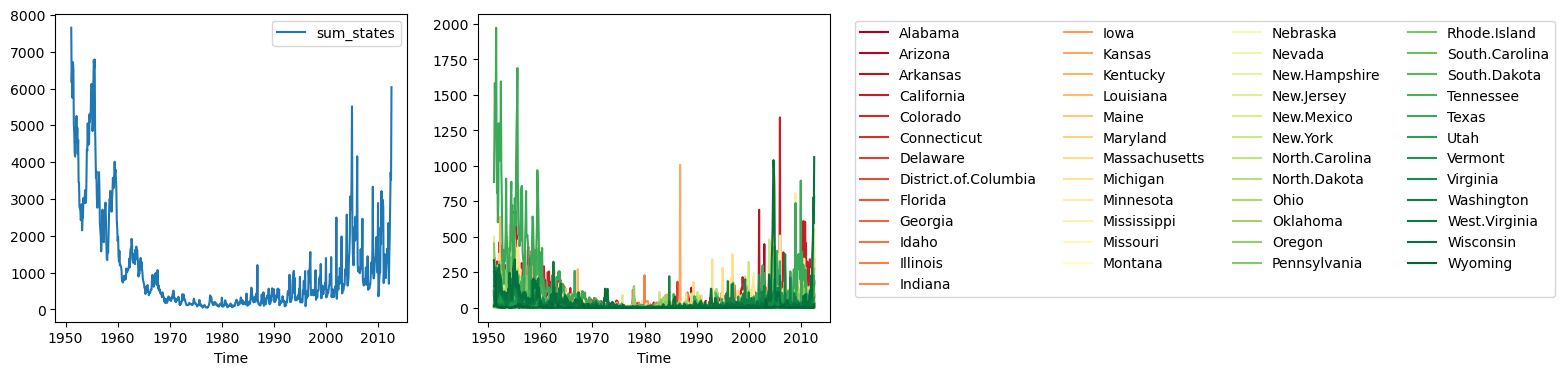

In [5]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
pertussis_monthly.plot(x='Time', y = 'sum_states', ax = ax[0])

pertussis_monthly.plot( x='Time',y=states_monthly, ax = ax[1], color = colors)
ax[1].legend(ncol = 4,bbox_to_anchor=(1.05, 1))
plt.show()

In [6]:
pertussis_monthly.columns = [x.replace('.', ' ').upper() for x in pertussis_monthly.columns]
states_monthly= pertussis_monthly.columns[2:-3]

In [7]:
pertussis_yearly = pertussis_monthly.groupby('YEAR').sum()

In [8]:
pertussis_yearly.head()

,MONTH,ALABAMA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,SUM_STATES,MEAN_STATES,TIME
YEAR,,,,,,,,,,,,,,,,,,,,,
1951.0,78.0,1278.0,1872.0,1601.0,3195.0,940.0,562.0,65.0,210.0,920.0,...,188.0,816.0,2050.0,661.0,1927.0,2845.0,417.0,67081.0,1369.000000,23418.5
1952.0,78.0,693.0,1762.0,570.0,4411.0,445.0,492.0,39.0,79.0,291.0,...,167.0,374.0,885.0,164.0,1851.0,1579.0,31.0,43651.0,890.836735,23430.5
1953.0,78.0,326.0,255.0,592.0,2143.0,198.0,626.0,35.0,162.0,209.0,...,91.0,564.0,393.0,607.0,659.0,1265.0,53.0,34396.0,701.959184,23442.5
1954.0,78.0,789.0,838.0,870.0,4988.0,282.0,2066.0,34.0,148.0,339.0,...,553.0,572.0,1410.0,1419.0,1575.0,2171.0,21.0,60886.0,1242.571429,23454.5
1955.0,78.0,1810.0,1675.0,1680.0,4950.0,599.0,840.0,71.0,106.0,1080.0,...,699.0,230.0,1481.0,1005.0,1970.0,2147.0,128.0,61650.0,1258.163265,23466.5


In [9]:
files_pop = glob.glob('data/*census*.csv')
#clean data
df_1 = pd.read_csv(files_pop[0])
df_1 = df_1.replace(' Oklahoma[m]', ' Oklahoma')
df_1 = df_1.replace('[n]', '')

df_2 =  pd.read_csv(files_pop[1])
df_2 = df_2.replace('[n]', '')

[x for x in df_2['Name'].unique() if x not in df_1['Name'].unique()]

[' Northern Mariana Islands [w]',
 'Trust Territory of the Pacific Islands Pacific Trust Territory [p][x]',
 ' Palau [y][z]']

In [10]:
df_1.loc[df_1['Name'] == ' Oklahoma', '1890'] = 258657
df_1.loc[df_1['Name'] == ' Oklahoma', '1900'] = 790391

In [11]:
pop_census = df_2.merge( df_1, left_on='Name',right_on='Name', how='left')
pop_census['Name'] = [x[1:].upper() for x in pop_census['Name']]

In [12]:
pop_census = pop_census.set_index('Name').T

In [13]:
pop_census['GEORGIA'] = pop_census['EORGIA (U.S. STATE) GEORGIA']

In [14]:
pop_census.index = pop_census.index.astype('int')

In [15]:
pop_census = pop_census.replace('[n]','')

In [16]:
pop_census = pop_census.replace(' ', np.nan)
pop_census = pop_census.astype('float')
pop_census =pop_census.sort_index() 

/tmp/ipykernel_1028848/2599535699.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pop_census = pop_census.replace(' ', np.nan)


In [17]:
pop_census.head()

Name,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,TEXAS,U.S. VIRGIN ISLANDS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA
1870,996992.0,NaN,NaN,9658.0,484471.0,560247.0,39864.0,537454.0,125015.0,131700.0,...,818579.0,NaN,86336.0,330551.0,1225163.0,23955.0,442014.0,1054670.0,9118.0,1184109.0
1880,1262505.0,NaN,NaN,40440.0,802525.0,864694.0,194327.0,622700.0,146608.0,177624.0,...,1591749.0,NaN,143963.0,332286.0,1512565.0,75116.0,618457.0,1315497.0,20789.0,1542180.0
1890,1513017.0,33426.0,NaN,88243.0,1128211.0,1213398.0,413249.0,746258.0,168493.0,230392.0,...,2235523.0,NaN,210779.0,332422.0,1655980.0,357232.0,762794.0,1693330.0,60705.0,1837353.0
1900,1828697.0,32052.0,NaN,122931.0,1311564.0,1485053.0,539700.0,908420.0,184735.0,278718.0,...,3048710.0,NaN,276749.0,343641.0,1854184.0,518103.0,958800.0,2069042.0,92531.0,2216331.0
1910,2138093.0,64356.0,NaN,204354.0,1574449.0,2377549.0,799024.0,1114756.0,202322.0,331069.0,...,3896542.0,NaN,373351.0,355956.0,2061612.0,1141990.0,1221119.0,2333860.0,145965.0,2609121.0


In [18]:
repeat_census = pop_census.loc[pop_census.index.repeat(10)].reset_index(drop=True)
repeat_census = repeat_census.set_index(np.arange(1870, 2020))
repeat_census.head()

Name,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,TEXAS,U.S. VIRGIN ISLANDS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA
1870,996992.0,NaN,NaN,9658.0,484471.0,560247.0,39864.0,537454.0,125015.0,131700.0,...,818579.0,NaN,86336.0,330551.0,1225163.0,23955.0,442014.0,1054670.0,9118.0,1184109.0
1871,996992.0,NaN,NaN,9658.0,484471.0,560247.0,39864.0,537454.0,125015.0,131700.0,...,818579.0,NaN,86336.0,330551.0,1225163.0,23955.0,442014.0,1054670.0,9118.0,1184109.0
1872,996992.0,NaN,NaN,9658.0,484471.0,560247.0,39864.0,537454.0,125015.0,131700.0,...,818579.0,NaN,86336.0,330551.0,1225163.0,23955.0,442014.0,1054670.0,9118.0,1184109.0
1873,996992.0,NaN,NaN,9658.0,484471.0,560247.0,39864.0,537454.0,125015.0,131700.0,...,818579.0,NaN,86336.0,330551.0,1225163.0,23955.0,442014.0,1054670.0,9118.0,1184109.0
1874,996992.0,NaN,NaN,9658.0,484471.0,560247.0,39864.0,537454.0,125015.0,131700.0,...,818579.0,NaN,86336.0,330551.0,1225163.0,23955.0,442014.0,1054670.0,9118.0,1184109.0


In [19]:
prop_diff = (pop_census.diff(axis = 0)/10).shift(-1)
prop_diff.loc[2010, :] =0 
prop_diff.head()

Name,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,TEXAS,U.S. VIRGIN ISLANDS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA
1870,26551.3,NaN,NaN,3078.2,31805.4,30444.7,15446.3,8524.6,2159.3,4592.4,...,77317.0,NaN,5762.7,173.5,28740.2,5116.1,17644.3,26082.7,1167.1,35807.1
1880,25051.2,NaN,NaN,4780.3,32568.6,34870.4,21892.2,12355.8,2188.5,5276.8,...,64377.4,NaN,6681.6,13.6,14341.5,28211.6,14433.7,37783.3,3991.6,29517.3
1890,31568.0,-137.4,NaN,3468.8,18335.3,27165.5,12645.1,16216.2,1624.2,4832.6,...,81318.7,NaN,6597.0,1121.9,19820.4,16087.1,19600.6,37571.2,3182.6,37897.8
1900,30939.6,3230.4,NaN,8142.3,26288.5,89249.6,25932.4,20633.6,1758.7,5235.1,...,84783.2,NaN,9660.2,1231.5,20742.8,62388.7,26231.9,26481.8,5343.4,39279.0
1910,21008.1,-932.0,NaN,12980.8,17775.5,104931.2,14060.5,26587.5,2068.1,10650.2,...,76668.6,NaN,7604.5,-352.8,24757.5,21463.1,24258.2,29820.7,4843.7,28671.1


In [20]:
repeat_increase = prop_diff.loc[prop_diff.index.repeat(10)].reset_index(drop=True)
repeat_increase = repeat_increase.multiply(list(np.arange(0,10))*15, axis =0)
repeat_increase = repeat_increase.set_index(np.arange(1870, 2020))
repeat_increase.head()

Name,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,TEXAS,U.S. VIRGIN ISLANDS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA
1870,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1871,26551.3,NaN,NaN,3078.2,31805.4,30444.7,15446.3,8524.6,2159.3,4592.4,...,77317.0,NaN,5762.7,173.5,28740.2,5116.1,17644.3,26082.7,1167.1,35807.1
1872,53102.6,NaN,NaN,6156.4,63610.8,60889.4,30892.6,17049.2,4318.6,9184.8,...,154634.0,NaN,11525.4,347.0,57480.4,10232.2,35288.6,52165.4,2334.2,71614.2
1873,79653.9,NaN,NaN,9234.6,95416.2,91334.1,46338.9,25573.8,6477.9,13777.2,...,231951.0,NaN,17288.1,520.5,86220.6,15348.3,52932.9,78248.1,3501.3,107421.3
1874,106205.2,NaN,NaN,12312.8,127221.6,121778.8,61785.2,34098.4,8637.2,18369.6,...,309268.0,NaN,23050.8,694.0,114960.8,20464.4,70577.2,104330.8,4668.4,143228.4


In [21]:
census_yearly = (repeat_census+ repeat_increase)
census_yearly.head()

Name,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,TEXAS,U.S. VIRGIN ISLANDS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA
1870,996992.0,NaN,NaN,9658.0,484471.0,560247.0,39864.0,537454.0,125015.0,131700.0,...,818579.0,NaN,86336.0,330551.0,1225163.0,23955.0,442014.0,1054670.0,9118.0,1184109.0
1871,1023543.3,NaN,NaN,12736.2,516276.4,590691.7,55310.3,545978.6,127174.3,136292.4,...,895896.0,NaN,92098.7,330724.5,1253903.2,29071.1,459658.3,1080752.7,10285.1,1219916.1
1872,1050094.6,NaN,NaN,15814.4,548081.8,621136.4,70756.6,554503.2,129333.6,140884.8,...,973213.0,NaN,97861.4,330898.0,1282643.4,34187.2,477302.6,1106835.4,11452.2,1255723.2
1873,1076645.9,NaN,NaN,18892.6,579887.2,651581.1,86202.9,563027.8,131492.9,145477.2,...,1050530.0,NaN,103624.1,331071.5,1311383.6,39303.3,494946.9,1132918.1,12619.3,1291530.3
1874,1103197.2,NaN,NaN,21970.8,611692.6,682025.8,101649.2,571552.4,133652.2,150069.6,...,1127847.0,NaN,109386.8,331245.0,1340123.8,44419.4,512591.2,1159000.8,13786.4,1327337.4


In [22]:
pertussis_monthly['YEAR'] = pertussis_monthly['YEAR'].astype(int)

In [23]:
states = [state for state in census_yearly.columns if state in states_monthly]

In [24]:
incidence_monthly =(pertussis_monthly.set_index('YEAR')[states]/census_yearly[states]).loc[1951:2013].reset_index()

In [25]:
incidence_monthly['YEAR'] = pertussis_monthly['YEAR'].astype(int)
incidence_monthly['MONTH'] = pertussis_monthly['MONTH'].astype(int)
incidence_monthly['TIME'] = pertussis_monthly['TIME'].astype(float)
incidence_monthly['sum_states'] = incidence_monthly[states].sum(axis=1,skipna=True)
incidence_monthly['mean_states'] = incidence_monthly[states].mean(axis=1,skipna=True)
incidence_monthly.head()

,index,ALABAMA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA,YEAR,MONTH,TIME,sum_states,mean_states
0,1951,0.000043,0.000312,0.000065,0.000023,0.000086,0.000051,0.000057,0.000029,0.000017,...,0.000048,0.000076,0.000096,0.000041,0.000029,1951.0,1.0,1951.083333,0.003695,0.000075
1,1951,0.000030,0.000256,0.000114,0.000018,0.000038,0.000032,0.000012,0.000029,0.000026,...,0.000021,0.000078,0.000079,0.000041,0.000035,1951.0,2.0,1951.166667,0.002654,0.000054
2,1951,0.000033,0.000437,0.000075,0.000017,0.000052,0.000009,0.000018,0.000020,0.000017,...,0.000031,0.000097,0.000054,0.000092,0.000031,1951.0,3.0,1951.250000,0.002632,0.000054
3,1951,0.000048,0.000271,0.000074,0.000017,0.000057,0.000011,0.000024,0.000044,0.000032,...,0.000020,0.000089,0.000061,0.000112,0.000058,1951.0,4.0,1951.333333,0.002245,0.000046
4,1951,0.000082,0.000338,0.000131,0.000029,0.000078,0.000017,0.000027,0.000021,0.000040,...,0.000047,0.000131,0.000072,0.000852,0.000041,1951.0,5.0,1951.416667,0.003475,0.000071


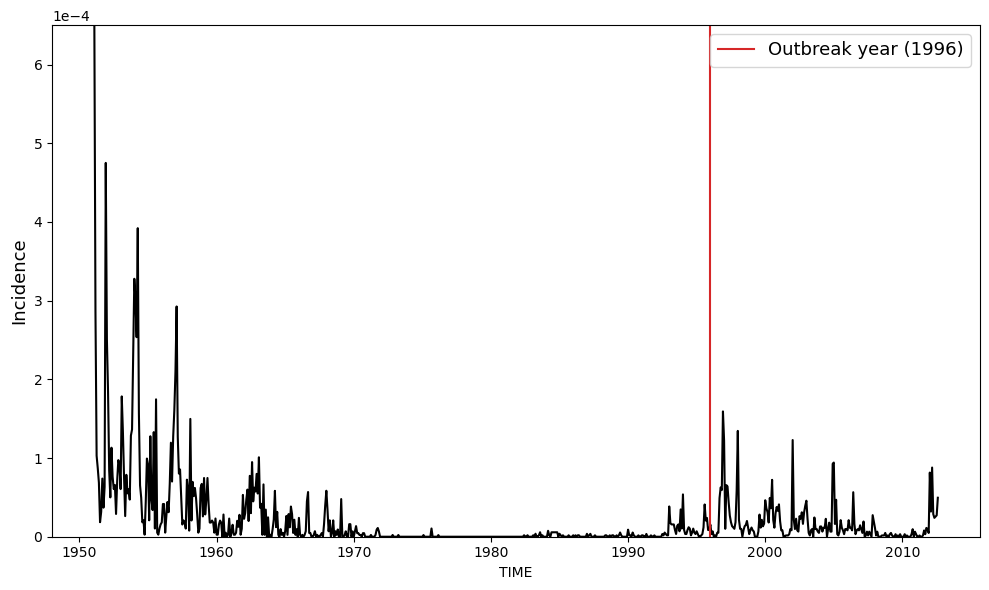

In [26]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, figsize = (10, 6))
incidence_monthly.plot(ax=ax,x='TIME', y='VERMONT', c = 'k', legend = False, label ='')
ax.set_ylabel('Incidence', fontsize = 13)
ax.plot([1996, 1996], [0, 0.00065], c='tab:red', label ='Outbreak year (1996)')
ax.ticklabel_format(style='sci',scilimits=(-3,4),axis='both')
ax.set_ylim([0, 0.00065])

ax.legend(loc='upper right', fontsize = 13)
fig.tight_layout()
# fig.savefig('vermont_incidence.pdf')

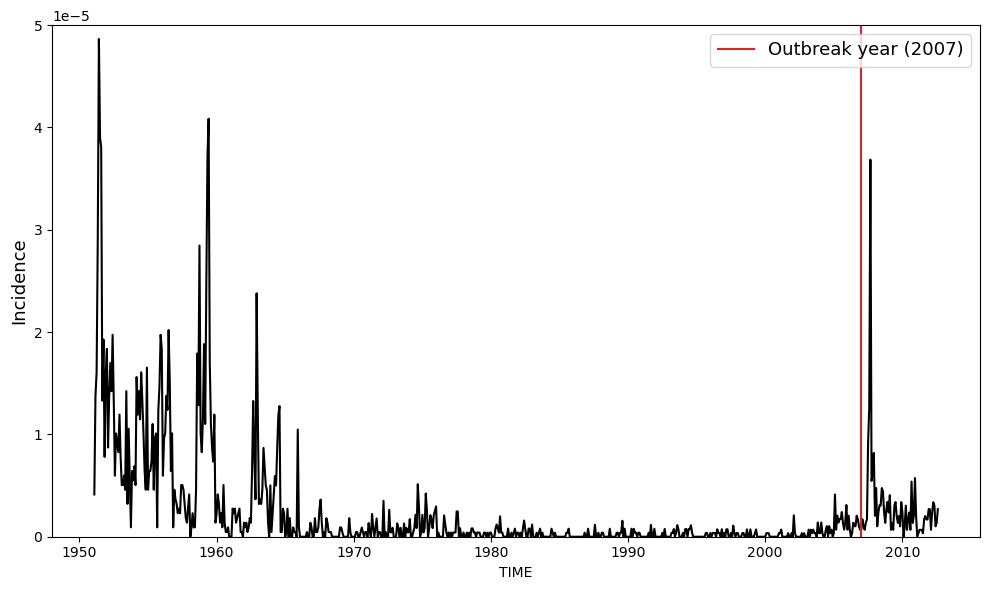

In [27]:
fig, ax = plt.subplots(1, figsize = (10, 6))
incidence_monthly.plot(ax=ax,x='TIME', y='MISSISSIPPI', c = 'k', legend = False, label ='')
ax.set_ylabel('Incidence', fontsize = 13)
ax.plot([2007, 2007], [0, 0.00005], c='tab:red', label ='Outbreak year (2007)')
ax.ticklabel_format(style='sci',scilimits=(-3,4),axis='both')
ax.set_ylim([0, 0.00005])
ax.legend(loc='upper right', fontsize = 13)
fig.tight_layout()
# fig.savefig('mississi_incidence.pdf')

In [28]:
detrend_monthly =incidence_monthly[states].subtract(incidence_monthly['mean_states'].values, 
                                                            axis = 'rows')
detrend_monthly['TIME'] = incidence_monthly['TIME']

In [29]:
detrend_monthly =incidence_monthly[states].subtract(incidence_monthly['mean_states'].values, 
                                                            axis = 'rows')
detrend_monthly['TIME'] = incidence_monthly['TIME']
detrend_monthly = detrend_monthly.set_index('TIME')
detrend_monthly.head()

,ALABAMA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,IDAHO,...,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA
TIME,,,,,,,,,,,,,,,,,,,,,
1951.083333,-0.000033,0.000236,-0.000010,-0.000052,0.000010,-0.000024,-0.000018,-0.000047,-0.000058,-0.000030,...,-0.000049,0.000037,-6.694786e-05,0.000584,0.000022,-0.000028,9.320326e-07,2.068052e-05,-0.000035,-0.000046
1951.166667,-0.000024,0.000202,0.000060,-0.000036,-0.000016,-0.000022,-0.000042,-0.000025,-0.000028,-0.000022,...,-0.000044,0.000095,-4.005211e-05,0.000231,0.000004,-0.000033,2.369309e-05,2.529826e-05,-0.000013,-0.000019
1951.250000,-0.000021,0.000384,0.000021,-0.000037,-0.000002,-0.000044,-0.000036,-0.000034,-0.000037,-0.000013,...,-0.000028,0.000147,-1.121123e-07,0.000049,0.000029,-0.000022,4.322850e-05,7.932972e-07,0.000038,-0.000023
1951.333333,0.000002,0.000225,0.000028,-0.000029,0.000011,-0.000035,-0.000022,-0.000002,-0.000014,-0.000026,...,-0.000025,0.000127,-2.889581e-05,0.000041,0.000011,-0.000026,4.358042e-05,1.470256e-05,0.000066,0.000013
1951.416667,0.000011,0.000267,0.000060,-0.000042,0.000007,-0.000054,-0.000044,-0.000050,-0.000031,-0.000011,...,-0.000040,0.000093,-3.424879e-05,-0.000002,-0.000012,-0.000024,6.016918e-05,1.364872e-06,0.000781,-0.000030


In [30]:
ktau_state_all = {}
ktau_state_1991 = {}
for state in states:
    state_data = detrend_monthly.reset_index()
    state_data = state_data[['TIME', state]]
    ktau_state_all[state] = state_data.corr(method = 'kendall').loc['TIME', state]
    ktau_state_1991[state] = state_data.loc[state_data['TIME']>1991].corr(method = 'kendall').loc['TIME', state]


In [31]:
ktau_state_all

{'ALABAMA': 0.014210223293031303,
 'ARIZONA': -0.4005376048347763,
 'ARKANSAS': 0.04524168381061347,
 'CALIFORNIA': -0.1584174028479121,
 'COLORADO': 0.20652465683408527,
 'CONNECTICUT': -0.19409881514241392,
 'DELAWARE': -0.04628315565970273,
 'DISTRICT OF COLUMBIA': 0.11832807096677189,
 'FLORIDA': -0.04664987109952289,
 'IDAHO': 0.2420651946708912,
 'ILLINOIS': 0.10635114470224538,
 'INDIANA': 0.0011184820914514962,
 'IOWA': 0.37503621314968216,
 'KANSAS': 0.3474445434576131,
 'KENTUCKY': -0.41670242142204905,
 'LOUISIANA': 0.13739727383742037,
 'MAINE': -0.20752060023983185,
 'MARYLAND': 0.18961021815901513,
 'MASSACHUSETTS': 0.35921610907584034,
 'MICHIGAN': -0.3477475887377598,
 'MINNESOTA': 0.4701695325478288,
 'MISSISSIPPI': 0.10583040877770074,
 'MISSOURI': 0.41870468772346714,
 'MONTANA': -0.06500020224082838,
 'NEBRASKA': 0.2987300644319027,
 'NEVADA': 0.16352457961485992,
 'NEW HAMPSHIRE': 0.15612909850343426,
 'NEW JERSEY': 0.0001210160951406537,
 'NEW MEXICO': 0.073442101

In [32]:
df_ktau = pd.concat([pd.DataFrame(ktau_state_all, index = [1]
            ), pd.DataFrame(ktau_state_1991, index=[1991])])
df_ktau = df_ktau.T
df_ktau = df_ktau.reset_index()
df_ktau.head()

,index,1,1991
0,ALABAMA,0.014210,-0.247733
1,ARIZONA,-0.400538,0.019963
2,ARKANSAS,0.045242,-0.036665
3,CALIFORNIA,-0.158417,-0.253659
4,COLORADO,0.206525,-0.028926


In [33]:
us_states = gpd.read_file(glob.glob("data/States_shapefile-shp/*.shp" )[0])
us_states.shape

(51, 7)

In [34]:
state_plots =[x for x in us_states['State_Name'].values if x not in ['ALASKA', 'HAWAII']]

In [35]:
us_states = us_states.set_index('State_Name').loc[state_plots].reset_index()
us_states.columns

Index(['State_Name', 'FID', 'Program', 'State_Code', 'Flowing_St', 'FID_1',
       'geometry'],
      dtype='object')

In [36]:
incidence_yearly = (pertussis_monthly.groupby('YEAR').sum()[states]/census_yearly[states]).loc[pertussis_monthly.groupby('YEAR').sum()[states].index.values]

In [37]:
incidence_yearly.head()

,ALABAMA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,IDAHO,...,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA
1951,0.000415,0.002326,0.000844,0.000288,0.000687,0.000273,0.000196,0.000263,0.000308,0.000490,...,0.000337,0.001748,0.000265,0.002153,0.000606,0.000272,0.000968,0.000816,0.001416,0.000341
1952,0.000223,0.002049,0.000302,0.000380,0.000315,0.000233,0.000113,0.000099,0.000091,0.000127,...,0.000241,0.001191,0.000229,0.000984,0.000257,0.000066,0.000936,0.000446,0.000104,0.000112
1953,0.000104,0.000279,0.000316,0.000177,0.000136,0.000289,0.000098,0.000205,0.000061,0.000175,...,0.000119,0.000580,0.000121,0.001479,0.000112,0.000241,0.000336,0.000352,0.000175,0.000034
1954,0.000251,0.000863,0.000468,0.000395,0.000188,0.000931,0.000092,0.000188,0.000093,0.000305,...,0.000315,0.000689,0.000719,0.001495,0.000394,0.000552,0.000809,0.000596,0.000069,0.000098
1955,0.000572,0.001633,0.000909,0.000376,0.000389,0.000370,0.000186,0.000135,0.000280,0.000269,...,0.000403,0.001194,0.000885,0.000599,0.000407,0.000384,0.001019,0.000581,0.000413,0.000277


In [38]:
for year in range(1991, 2010):
#     incidence_year = incidence_monthly.groupby('index').sum().loc[int(year),:].to_frame()
    incidence_year = incidence_yearly.loc[int(year),:].to_frame()
    incidence_year = incidence_year.reset_index()
    us_states = us_states.merge(incidence_year, left_on='State_Name', right_on='index', how='left',suffixes=('',''))
    if 'index' in us_states.columns:
        us_states.drop(columns='index')
    us_states.columns


ValueError: columns overlap but no suffix specified: Index(['index'], dtype='object')

In [ ]:
us_states.columns

Index(['State_Name',        'FID',    'Program', 'State_Code', 'Flowing_St',
            'FID_1',   'geometry',    'index_x',     '1991_x',    'index_y',
               1992,      'index',     '1991_y'],
      dtype='object')

KeyError: 1994

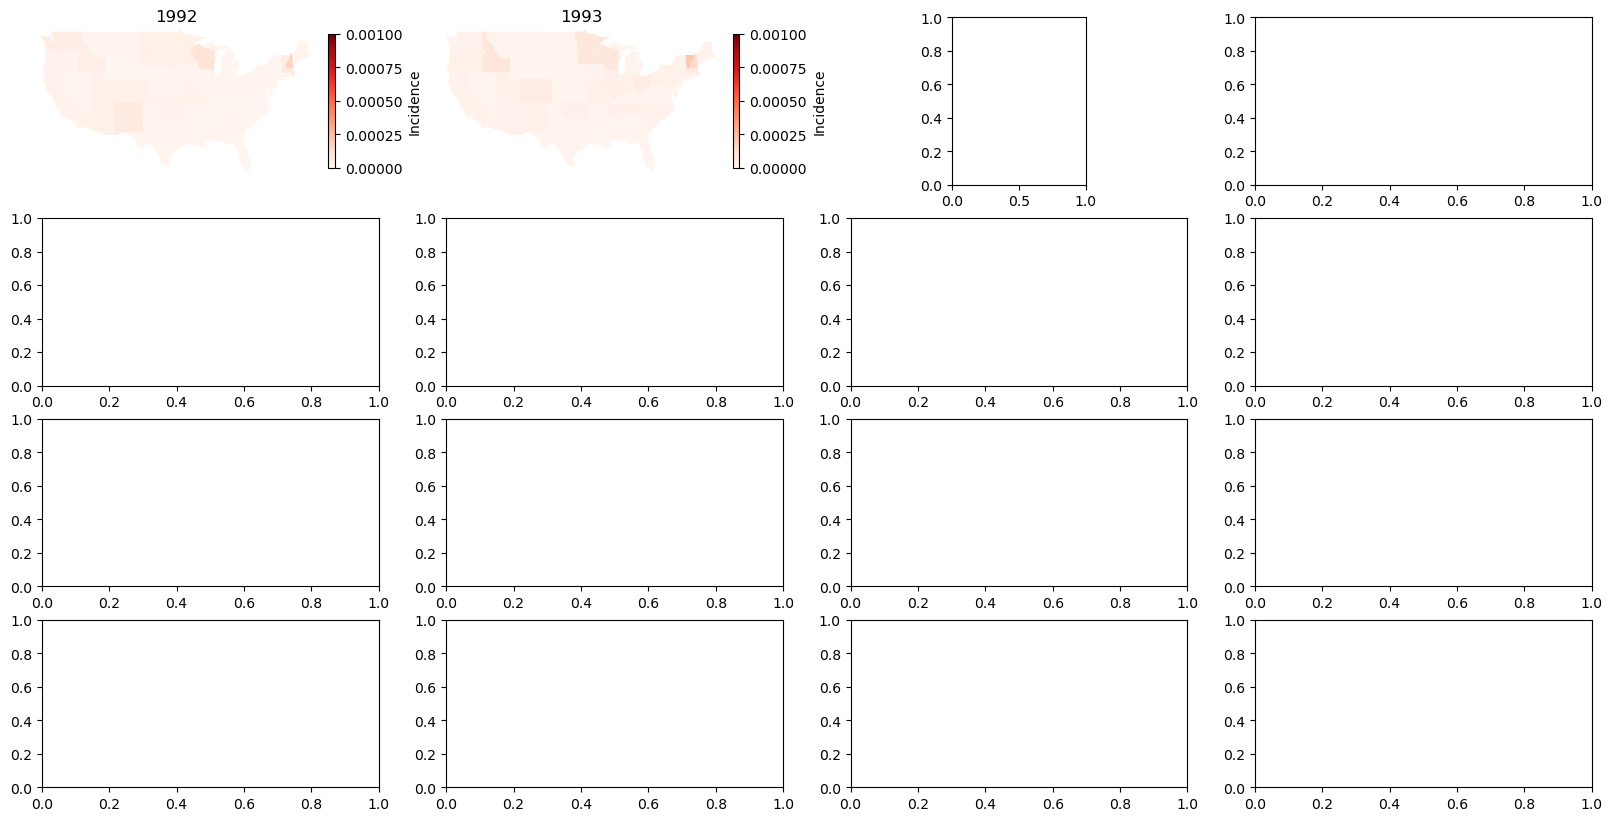

In [ ]:
fig, ax = plt.subplots(4,4,figsize = (20, 10))
ax = ax.ravel()
for index_year, year in enumerate(range(1992, 2006)):
    us_states.plot(column = year,legend = True, 
                     vmin = 0, vmax =    0.001,
                   cmap = 'Reds', 
                      legend_kwds={'shrink': 0.8, 'label': 'Incidence'
                                  }, ax = ax[index_year])
    ax[index_year].axis('off')

    ax[index_year].margins(0)
    ax[index_year].set_title(str(year))
    if index_year == 13:
        sum_00_09 = us_states[[int(x) for x in range(1992,2006)]].sum(axis=1).values
        us_states['sum_00_09'] = sum_00_09
        vmax = max(sum_00_09)
        us_states.plot(column = 'sum_00_09',legend = True, 
                     vmin = 0, vmax =    vmax,
                   cmap = 'Reds', 
                      legend_kwds={'shrink': 0.8, 'label': 'Incidence'
                                  }, ax = ax[index_year+1])
        ax[index_year+1].axis('off')

        ax[index_year+1].margins(0)
        ax[index_year+1].set_title('Total incidence 1992 to 2005')
        
        diff_00_09 = us_states[2006].values-us_states[1992].values
        us_states['diff_00_09'] = diff_00_09
        vmax = max(diff_00_09)
        vmin = min(diff_00_09)
        print(vmax, vmin)
        us_states.plot(column = 'diff_00_09',legend = True, 
                     vmin = vmin, vmax =    vmax,
                   cmap = 'RdBu_r', 
                      legend_kwds={'shrink': 0.8, 'label': 'Difference Incidence'
                                  }, ax = ax[index_year+2])
        ax[index_year+2].axis('off')

        ax[index_year+2].margins(0)
        ax[index_year+2].set_title('Difference in incidence (1992, 2005)')

In [ ]:
def bin_low_med_high_vhigh(df,colname, 
                           low_thresh, medium_thresh, 
                           high_thresh):
    arr = df[colname].values
    
    df['bin'+str(colname)] = 1
    df.loc[df[colname] <=low_thresh,
            'bin'+str(colname)] = 'Low'
    df.loc[((df[colname] >low_thresh) &
            (df[colname] <=medium_thresh)),
            'bin'+str(colname) ] = 'Medium'
    df.loc[((df[colname] >medium_thresh) &
            (df[colname] <=high_thresh)),
            'bin'+str(colname)] = 'High'
    df.loc[df[colname] >high_thresh,
           'bin'+str(colname)] = 'Very High'
#     df = df.drop('percentile_res'+data+date,1)
#     df.loc
    df.loc[df['bin'+str(colname)]==1, 'bin'+str(colname)]='No Cases'
    return df

In [ ]:
# threshcol = ['#b3cde3','#edf8fb','#8c96c6','#88419d']
threshcol = ['#ffffd4','#fed98e','#fe9929','#cc4c02']

color_mapping = {"Low":threshcol[0],"Medium":threshcol[1],
                "High": threshcol[2], "Very High":threshcol[3], 'No Cases':'lightgrey'}


In [ ]:

for year in range(1992, 2008):
    arr = us_states[year].values
    low = stats.scoreatpercentile(arr, 10)
    low_percentage = str(round((low)*100,7))+'%'
#     print(str(round((low)*100,7))+'%')
    med = stats.scoreatpercentile(arr, 50)
    med_percentage = str(round((med)*100,7))+'%'
#     print(str(round((med)*100,7))+'%')
    high = stats.scoreatpercentile(arr, 90)
    high_percentage = str(round((high)*100,7))+'%'
#     print(str(round((high)*100,7))+'%')
    us_states = bin_low_med_high_vhigh(df = us_states,
                                     colname=(year) ,
                                    low_thresh=low, 
                                    medium_thresh=med,
                                    high_thresh=high)

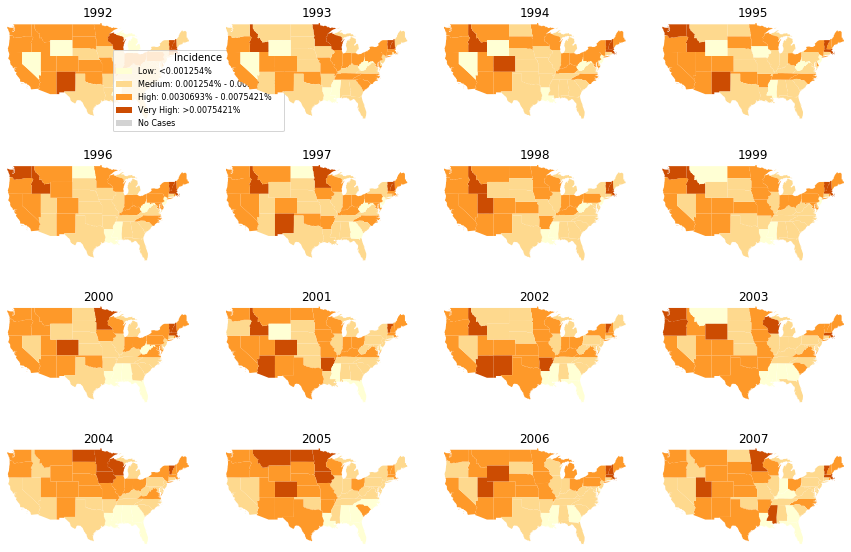

In [ ]:
import matplotlib as mpl
import matplotlib.patches as mpatches

fig, ax = plt.subplots(4,4,figsize = (15,10))
ax = ax.ravel()
col = []
for options in np.sort(us_states['bin'+'1992'].unique()):
    col.append(color_mapping[options])
cmap = mpl.colors.ListedColormap(col)
for in_year, year in enumerate(range(1992, 2008)):
    us_states.plot( column = 'bin'+str(year),
                    cmap = cmap,ax=ax[in_year],
            legend = False)

    ax[in_year].axis('off')

    ax[in_year].margins(0)
    ax[in_year].set_title(str(year))
    if year == 1992:
        low = mpatches.Patch( facecolor=color_mapping['Low'],
                                   label='Low: <'+low_percentage)
        med= mpatches.Patch( facecolor=color_mapping['Medium'],
                              label='Medium: '+low_percentage + ' - ' + med_percentage)
        high = mpatches.Patch(facecolor=color_mapping['High'],
                                      label='High: '+med_percentage + ' - ' + high_percentage)
        vhigh = mpatches.Patch(facecolor=color_mapping['Very High'],
                                     label='Very High: >'+high_percentage)

        no = mpatches.Patch(facecolor=color_mapping['No Cases'],
                                     label='No Cases')

        ax[in_year].legend(handles = [low, med, high, vhigh, no], 
                 ncol = 1,loc = 'center',
                  bbox_to_anchor=(1.05, 0.3), fontsize = 8,
                   title = 'Incidence')

In [ ]:
us_states['total_years_vhigh'] = (us_states[['bin'+str(year) for year in range(1992,2008)]]=='Very High').sum(axis = 1)

us_states['total_years_low'] = (us_states[['bin'+str(year) for year in range(1992,2008)]]=='Low').sum(axis = 1)

In [ ]:
us_states[['State_Name','total_years_low'] ].sort_values(by='total_years_low', ascending=False).head(n=4)

,State_Name,total_years_low
22,MISSISSIPPI,12
16,LOUISIANA,12
46,WEST VIRGINIA,7
9,GEORGIA,7


In [ ]:
us_states[['State_Name','total_years_vhigh'] ].sort_values(by='total_years_vhigh', ascending=False).head(n=4)

,State_Name,total_years_vhigh
43,VERMONT,14
19,MASSACHUSETTS,10
27,NEW HAMPSHIRE,9
10,IDAHO,9


# Calculating EWS 

In [39]:
from scipy.stats import iqr

def silvermans(x):
    each_loc = np.zeros(np.shape(x)[1])
    for index_x in range(np.shape(x)[1]):
        each_loc[index_x] = 1.06*np.minimum(np.nanstd(x[:,index_x]), 
                                           iqr(x[:,index_x], 
                                                nan_policy='omit')/1.34)*((len(x[:,index_x]))**(-1/5))
    return each_loc
# silvermans(incidence_monthly)



In [40]:
detrend_monthly =incidence_monthly[states].subtract(incidence_monthly['mean_states'].values, 
                                                            axis = 'rows')
detrend_monthly['TIME'] = incidence_monthly['TIME']
detrend_monthly = detrend_monthly.set_index('TIME')
detrend_monthly.head()

,ALABAMA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,IDAHO,...,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA
TIME,,,,,,,,,,,,,,,,,,,,,
1951.083333,-0.000033,0.000236,-0.000010,-0.000052,0.000010,-0.000024,-0.000018,-0.000047,-0.000058,-0.000030,...,-0.000049,0.000037,-6.694786e-05,0.000584,0.000022,-0.000028,9.320326e-07,2.068052e-05,-0.000035,-0.000046
1951.166667,-0.000024,0.000202,0.000060,-0.000036,-0.000016,-0.000022,-0.000042,-0.000025,-0.000028,-0.000022,...,-0.000044,0.000095,-4.005211e-05,0.000231,0.000004,-0.000033,2.369309e-05,2.529826e-05,-0.000013,-0.000019
1951.250000,-0.000021,0.000384,0.000021,-0.000037,-0.000002,-0.000044,-0.000036,-0.000034,-0.000037,-0.000013,...,-0.000028,0.000147,-1.121123e-07,0.000049,0.000029,-0.000022,4.322850e-05,7.932972e-07,0.000038,-0.000023
1951.333333,0.000002,0.000225,0.000028,-0.000029,0.000011,-0.000035,-0.000022,-0.000002,-0.000014,-0.000026,...,-0.000025,0.000127,-2.889581e-05,0.000041,0.000011,-0.000026,4.358042e-05,1.470256e-05,0.000066,0.000013
1951.416667,0.000011,0.000267,0.000060,-0.000042,0.000007,-0.000054,-0.000044,-0.000050,-0.000031,-0.000011,...,-0.000040,0.000093,-3.424879e-05,-0.000002,-0.000012,-0.000024,6.016918e-05,1.364872e-06,0.000781,-0.000030


In [41]:
window_size = 74
detrending_gaussian = incidence_monthly[states] - incidence_monthly[states].rolling(window=window_size,
                                                                   win_type='gaussian',
                                                                   center=True).mean(std = np.mean(silvermans(pertussis_monthly[states].values)))
detrending_gaussian['TIME'] = incidence_monthly['TIME']
detrending_gaussian = detrending_gaussian.groupby('TIME').mean()
detrending_gaussian.head()

,ALABAMA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,IDAHO,...,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA
TIME,,,,,,,,,,,,,,,,,,,,,
1951.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
incidence_mean=incidence_monthly.groupby('TIME').mean()
incidence_mean.head()

,index,ALABAMA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA,YEAR,MONTH,sum_states,mean_states
TIME,,,,,,,,,,,,,,,,,,,,,
1951.083333,1951.0,0.000043,0.000312,0.000065,0.000023,0.000086,0.000051,0.000057,0.000029,0.000017,...,0.000098,0.000048,0.000076,0.000096,0.000041,0.000029,1951.0,1.0,0.003695,0.000075
1951.166667,1951.0,0.000030,0.000256,0.000114,0.000018,0.000038,0.000032,0.000012,0.000029,0.000026,...,0.000058,0.000021,0.000078,0.000079,0.000041,0.000035,1951.0,2.0,0.002654,0.000054
1951.250000,1951.0,0.000033,0.000437,0.000075,0.000017,0.000052,0.000009,0.000018,0.000020,0.000017,...,0.000082,0.000031,0.000097,0.000054,0.000092,0.000031,1951.0,3.0,0.002632,0.000054
1951.333333,1951.0,0.000048,0.000271,0.000074,0.000017,0.000057,0.000011,0.000024,0.000044,0.000032,...,0.000056,0.000020,0.000089,0.000061,0.000112,0.000058,1951.0,4.0,0.002245,0.000046
1951.416667,1951.0,0.000082,0.000338,0.000131,0.000029,0.000078,0.000017,0.000027,0.000021,0.000040,...,0.000059,0.000047,0.000131,0.000072,0.000852,0.000041,1951.0,5.0,0.003475,0.000071


In [43]:
def autocov(y, w, lag = 1):
    y_shift = y.shift(lag)
    y_shift = y_shift.rename('shift')
    y = y.rename('original')
    df = pd.concat([y, y_shift], axis =1)
    return_dict = {'cov':df.rolling(window = w).cov(pairwise = False)['original'],
                   'corr':df['original'].rolling(center = False,
                                          window = w).corr(df['shift'])
                   }
    return return_dict



In [44]:
high_incidence = us_states[us_states['total_years_vhigh']>=9].sort_values(by='total_years_vhigh', 
                                                                       ascending=False).State_Name.values
low_incidence = us_states[us_states['total_years_low']>=7].sort_values(by='total_years_low', 
                                                                       ascending=False).State_Name.values
# low_incidence = [x for x in low_incidence if x != 'DISTRICT OF COLUMBIA']


KeyError: 'total_years_vhigh'

In [ ]:
low_incidence = ['LOUISIANA', 'MISSISSIPPI', 'GEORGIA', 'WEST VIRGINIA']
high_incidence = ['VERMONT', 'MASSACHUSETTS', 'IDAHO', 'NEW HAMPSHIRE']
high_col = ['#d7b5d8','#df65b0','#dd1c77','#980043']
low_col = ['#f0f9e8','#bae4bc','#7bccc4','#43a2ca','#0868ac']

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [45]:
incidence_mean=incidence_monthly.groupby('TIME').mean()
spatial_detrend = {}
gaussian_detrend = {}
window_size=74
var_spatial = (detrend_monthly**2).rolling(window = window_size, min_periods=1,
                                          center = False).mean()
# var_spatial = detrend_monthly.rolling(window = window_size, min_periods=1,
                                        #   center = False).var()
spatial_detrend['variance'] = var_spatial.reset_index()
gaussian_detrend_var = (detrending_gaussian**2).rolling(window = window_size, min_periods=1,
                                                       center = False).mean()
# gaussian_detrend_var = detrending_gaussian.rolling(window = window_size, min_periods=1,
#                                                        center = False).var()
gaussian_detrend['variance'] = gaussian_detrend_var.reset_index()

cv_spatial = (detrend_monthly).rolling(window = window_size, min_periods=1,
                                         center = False).std()/incidence_mean.rolling(window = window_size, 
                                                                                      min_periods=1,
                                                                                     center = False).mean()
spatial_detrend['CoV'] = cv_spatial.reset_index()
gaussian_detrend_cv = (detrending_gaussian).rolling(window = window_size, 
                                                    min_periods=1,
                                                    center = False).std()/incidence_mean.rolling(window = window_size,
                                                                                                 min_periods=1,
                                                                                                center = False).mean()
gaussian_detrend['CoV']  = gaussian_detrend_cv.reset_index()

ac_1 = detrend_monthly.copy()
for s in states:
    ac_1[s] = autocov(detrend_monthly[s].shift(1), window_size)['corr'].to_frame()[0]
spatial_detrend['AC(1)'] = ac_1.reset_index()

ac_1_gaussian = detrending_gaussian.copy()
for s in states:
    ac_1_gaussian[s] = autocov(detrending_gaussian[s].shift(1), window_size)['corr'].to_frame()[0]
gaussian_detrend['AC(1)'] = ac_1_gaussian.reset_index()


In [46]:
kendall_tau_stat = {}
for stat in ['variance','CoV', 'AC(1)']:
    print(stat)
    ktau_state_spatial = {}
    ktau_state_gaussian = {}
    for state in states:
        state_data = spatial_detrend[stat]
        state_data = state_data[['TIME', state]]
        ktau_state_spatial[state] = state_data.loc[(state_data['TIME']>1991) & (state_data['TIME']<2008)].corr(method = 'kendall').loc['TIME', state]

        state_data = gaussian_detrend[stat]
        state_data = state_data[['TIME', state]]
        ktau_state_gaussian[state] = state_data.loc[(state_data['TIME']>1991) & (state_data['TIME']<2008)].corr(method = 'kendall').loc['TIME', state]
    
    df_ktau = pd.concat([pd.DataFrame(ktau_state_spatial, index = ['spatial']
            ), pd.DataFrame(ktau_state_gaussian, index=['gaussian'])])
    df_ktau = df_ktau.T
    df_ktau = df_ktau.reset_index()
    df_ktau['states'] = df_ktau['index']
    kendall_tau_stat[stat] = df_ktau

variance
CoV
AC(1)


In [47]:
state_data = spatial_detrend['variance']
state_data = state_data[['TIME', 'VERMONT']]
state_data.loc[(state_data['TIME']>1991) & (state_data['TIME']<2008)].corr(method='kendall').loc['TIME','VERMONT']

0.4002828854314002

# Kendall-tau

In [48]:
def kendall_tau_ews_moving(df, start, end):
    kendall_tau_stat = {}
    for stat in ['variance','CoV', 'AC(1)']:
        ktau_state = {}
        for state in states:
            state_data = df[stat]
            state_data = state_data[['TIME', state]]
            ktau_state[state] = state_data.loc[(state_data['TIME']>=start) &
                                               (state_data['TIME']<=end)].corr(method = 'kendall').loc['TIME', state]

        kendall_tau_stat[stat] = pd.DataFrame(ktau_state, index = [0])
    return kendall_tau_stat


In [49]:
kendall_increasing_results = {}
missi_gaussian  ={}
vermont_gaussian = {}
missi_spatial  ={}
vermont_spatial = {}
for end_date in range(1991, 2003):
    test = kendall_tau_ews_moving(df = gaussian_detrend,
                      start = end_date,
                      end = 2007)
    kendall_increasing_results[end_date] = test
    missi_gaussian[end_date] = pd.concat(test)[['MISSISSIPPI']]
    vermont_gaussian[end_date] = pd.concat(test)[['VERMONT']]
    
    test = kendall_tau_ews_moving(df = spatial_detrend,
                      start = end_date,
                      end = 2007)
    kendall_increasing_results[end_date] = test
    missi_spatial[end_date] = pd.concat(test)[['MISSISSIPPI']]
    vermont_spatial[end_date] = pd.concat(test)[['VERMONT']]  

In [53]:
pd.concat(test)

,,ALABAMA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,IDAHO,...,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,GEORGIA
variance,0,0.757377,0.829508,0.744262,0.570492,0.565027,0.768306,0.762842,0.822951,0.758470,-0.844809,...,0.558470,0.524590,0.213115,-0.620765,0.657923,-0.351913,0.558470,0.848087,0.841530,0.724590
CoV,0,0.417486,-0.345355,-0.865574,0.233880,0.280874,0.384699,0.571585,-0.400000,0.512568,0.186885,...,-0.214208,-0.544262,-0.777049,-0.253552,-0.676503,-0.657923,-0.800000,0.338798,-0.337705,0.471038
AC(1),0,0.393443,-0.136612,0.372678,0.217486,0.456831,0.347541,0.398907,0.303825,0.304918,-0.363934,...,0.366120,0.307104,-0.120219,-0.656831,0.372678,-0.219672,0.374863,0.421858,-0.024044,0.336612


In [52]:
missi_gaussian

{1991:             MISSISSIPPI
 variance 0     0.202180
 CoV      0    -0.299978
 AC(1)    0    -0.065307,
 1992:             MISSISSIPPI
 variance 0     0.174340
 CoV      0    -0.224555
 AC(1)    0    -0.136034,
 1993:             MISSISSIPPI
 variance 0     0.193576
 CoV      0    -0.126233
 AC(1)    0    -0.279234,
 1994:             MISSISSIPPI
 variance 0     0.246938
 CoV      0    -0.031684
 AC(1)    0    -0.448636,
 1995:             MISSISSIPPI
 variance 0     0.353065
 CoV      0     0.021839
 AC(1)    0    -0.580843,
 1996:             MISSISSIPPI
 variance 0     0.493734
 CoV      0     0.083162
 AC(1)    0    -0.640693,
 1997:             MISSISSIPPI
 variance 0     0.529201
 CoV      0     0.134986
 AC(1)    0    -0.592837,
 1998:             MISSISSIPPI
 variance 0     0.613320
 CoV      0     0.146449
 AC(1)    0    -0.620116,
 1999:             MISSISSIPPI
 variance 0     0.673969
 CoV      0     0.047680
 AC(1)    0    -0.546821,
 2000:             MISSISSIPPI
 varia

In [55]:
missi_df_gaussian = pd.concat(missi_gaussian).reset_index().groupby(['level_1','level_0']).mean()
missi_df_spatial = pd.concat(missi_spatial).reset_index().groupby(['level_1','level_0']).mean()
missi_df_gaussian.index.names = ['stat', r'Time t, $EWS \in [t, 2007]$']
missi_df_spatial.index.names = ['stat', r'Time t, $EWS \in [t, 2007]$']

In [109]:
vermont_df_gaussian = pd.concat(vermont_gaussian).reset_index().groupby(['level_1','level_0']).mean()
vermont_df_spatial = pd.concat(vermont_spatial).reset_index().groupby(['level_1','level_0']).mean()
vermont_df_gaussian.index.names = ['stat', r'Time t, $EWS \in [t, 2007]$']
vermont_df_spatial.index.names = ['stat', r'Time t, $EWS \in [t, 2007]$']

In [110]:
vermont_df_spatial['col'] = 1

In [111]:
vermont_df_spatial.loc[(vermont_df_spatial['VERMONT']<0).values,'col']='decreasing'
vermont_df_spatial.loc[(vermont_df_spatial['VERMONT']>=0).values,'col']='increasing'
vermont_df_spatial.xs(stat, level = 0).index.values

/tmp/ipykernel_964976/1667744745.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'decreasing' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  vermont_df_spatial.loc[(vermont_df_spatial['VERMONT']<0).values,'col']='decreasing'


array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002])

/tmp/ipykernel_964976/1671240777.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_964976/1671240777.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_964976/1671240777.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


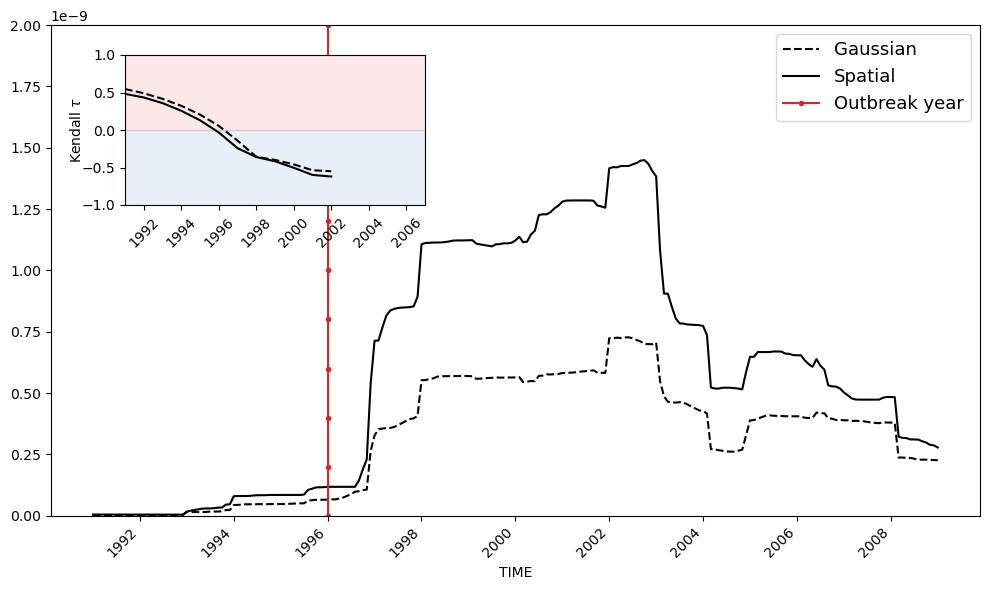

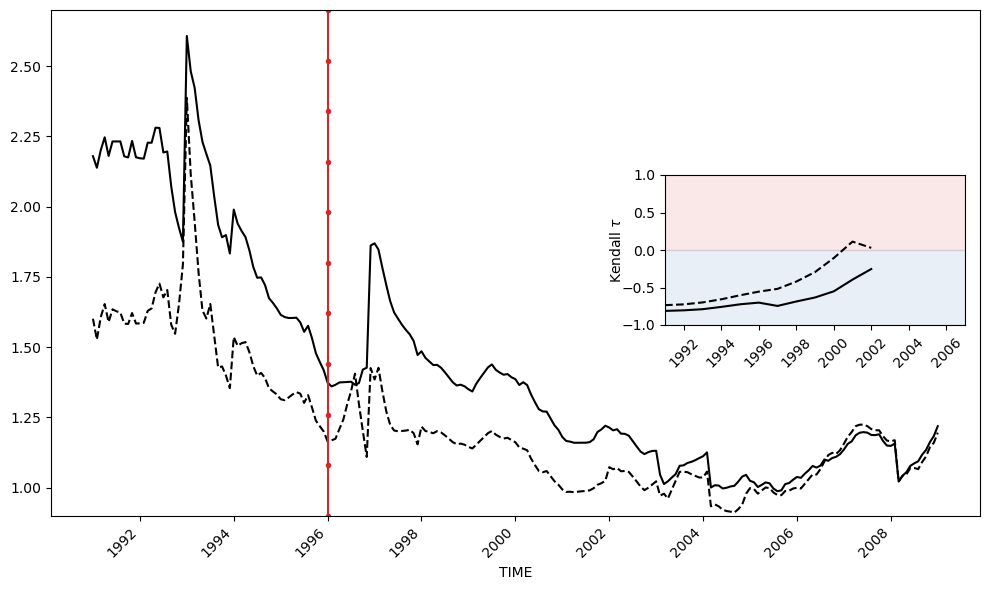

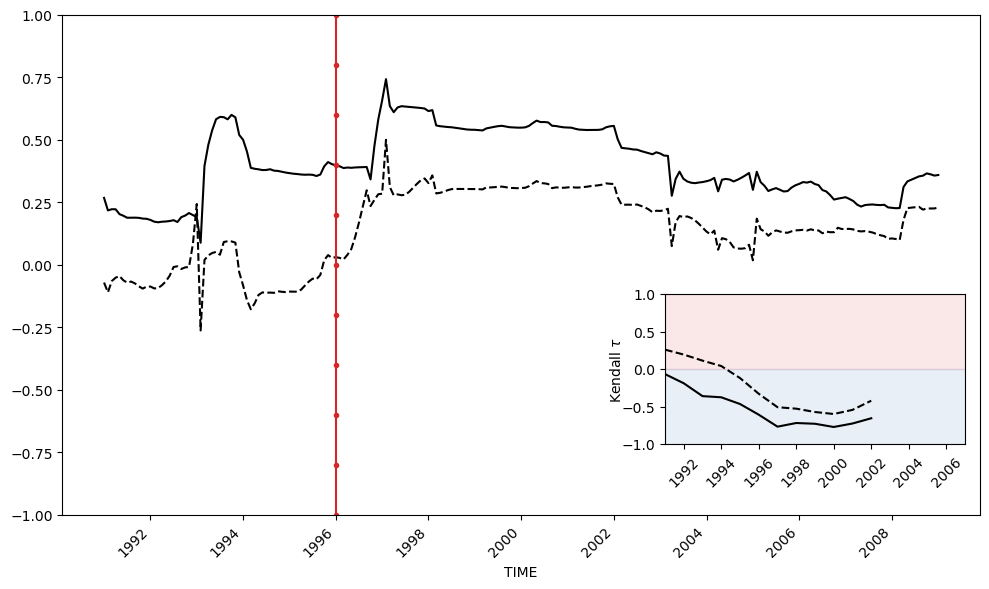

In [112]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
label_title = ['Variance', 'Coefficient of variation', 'Autocorrelation lag-1']
ymax = [2e-9, 2.7, 1]
ymin = [0, 0.9, -1]
inset_locy = [0.65, 0.45, 0.25]
inset_locx = [0.13, 0.67, 0.67]

for istat, stat in enumerate(['variance', 'CoV', 'AC(1)']):
    if stat =='variance':
        legend_value = True
    else:
        legend_value = False
    fig, ax1 = plt.subplots(figsize = (10,6))
    gaussian_detrend[stat][(gaussian_detrend[stat]['TIME']>=1991) & 
                                     (gaussian_detrend[stat]['TIME']<=2009)].plot(ax=ax1, color='k',
                                                                                  x='TIME',
                                                                                  y='VERMONT',
                                                                                 linestyle = '--',
                                                                                 label = 'Gaussian',
                                                                                 legend = legend_value)
    yrdy = spatial_detrend[stat][(spatial_detrend[stat]['TIME']>=1991) & 
                                 (spatial_detrend[stat]['TIME']<=2009)].plot(ax=ax1,
                                                                              x='TIME',
                                                                              y='VERMONT',color='k',
                                                                            label = 'Spatial'
                                                                            , legend=legend_value)
    ax1.plot(1996*np.ones(11), [ymin[istat] + ((ymax[istat]-ymin[istat])/10)*k for k in range(11)],
             '-',marker='.', c='tab:red', label = 'Outbreak year')
    if legend_value:
        ax1.legend(fontsize =13)
    ax1.set_ylim([ymin[istat],ymax[istat]])
    fig.autofmt_xdate(rotation=45)
    yrdy.xaxis.set_major_locator(MaxNLocator(integer=True))

    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [inset_locx[istat], inset_locy[istat], 0.3, 0.25]
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.set_ylim([-1,1])
    ax2.set_xlim([1991, 2007])
    # ax2.plot(range(6)[::-1], color='green')
    vermont_df_gaussian.xs(stat, level = 0).plot(ax = ax2, y='VERMONT',color='k',
                                                  linestyle = '--', legend =False)
    yy = vermont_df_spatial.xs(stat, level = 0).plot(ax = ax2, y='VERMONT',color='k',
                                                     linestyle = '-',legend = False)
    ax2.fill_between(range(1991, 2008
                          ), 1, 0, color='tab:red', alpha = 0.1)
    ax2.fill_between(range(1991, 2008
                      ), 0, -1, color='#2166ac', alpha = 0.1)
    yy.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.setp(  ax2.xaxis.get_majorticklabels(), rotation=45 )
    ax2.set_ylabel(r'Kendall $τ$', labelpad = -2)
    ax2.set_xlabel('')
#     ax1.set_title(label_title[istat])
    fig.tight_layout()
    # fig.savefig('Vermont_timeseries_kendall_tau' +stat+'.pdf')
# plt.setp(  ax[ind].xaxis.get_majorticklabels(), rotation=45 )

/tmp/ipykernel_964976/1671240777.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_964976/1671240777.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_964976/1671240777.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


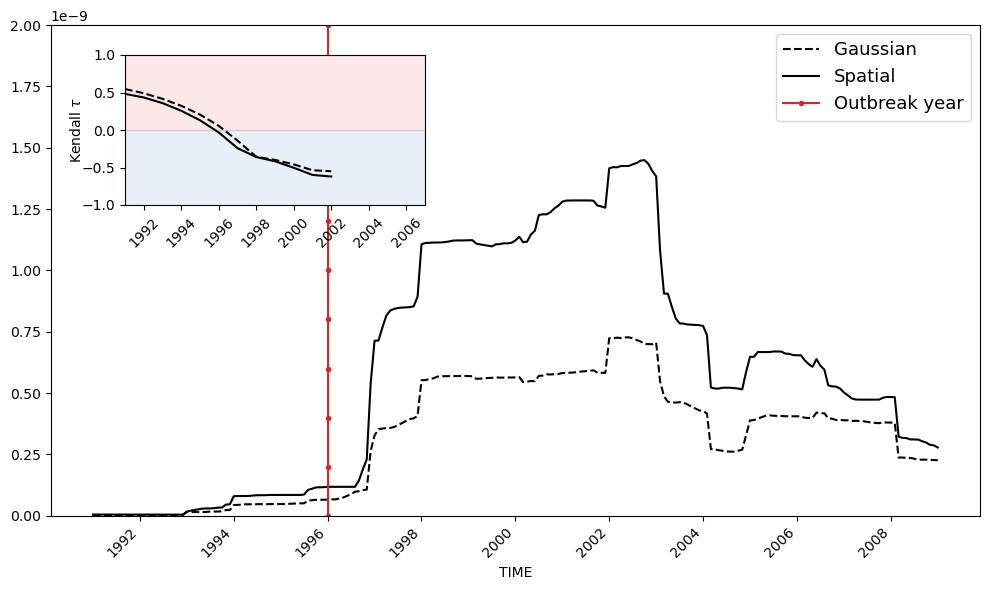

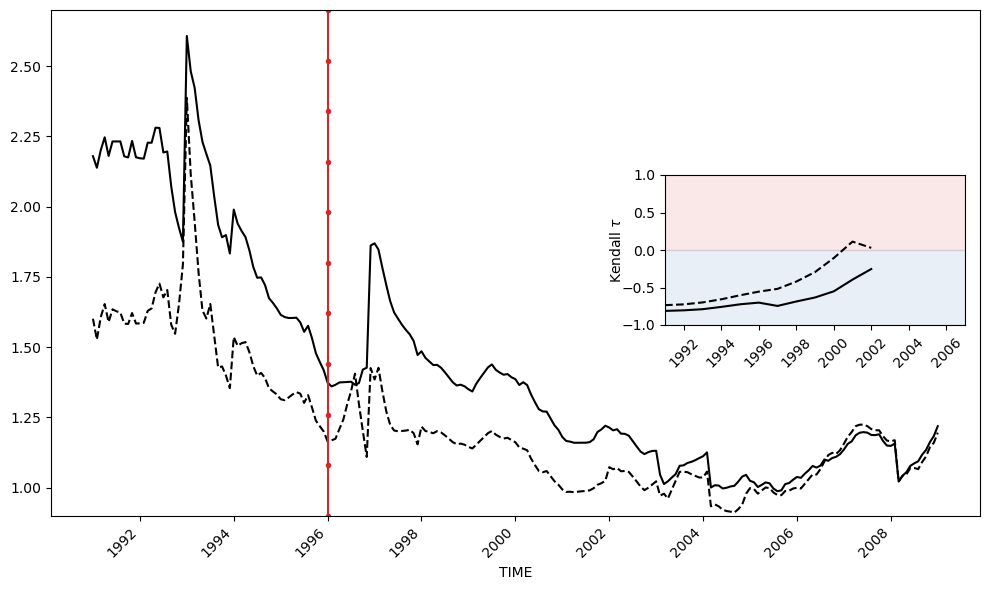

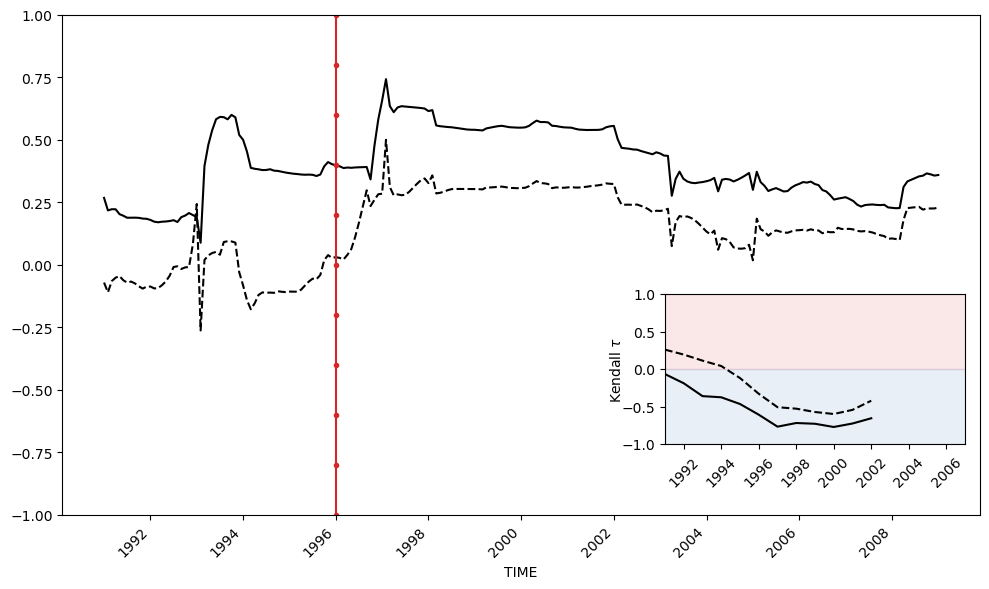

In [113]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
label_title = ['Variance', 'Coefficient of variation', 'Autocorrelation lag-1']
ymax = [2e-9, 2.7, 1]
ymin = [0, 0.9, -1]
inset_locy = [0.65, 0.45, 0.25]
inset_locx = [0.13, 0.67, 0.67]

for istat, stat in enumerate(['variance', 'CoV', 'AC(1)']):
    if stat =='variance':
        legend_value = True
    else:
        legend_value = False
    fig, ax1 = plt.subplots(figsize = (10,6))
    gaussian_detrend[stat][(gaussian_detrend[stat]['TIME']>=1991) & 
                                     (gaussian_detrend[stat]['TIME']<=2009)].plot(ax=ax1, color='k',
                                                                                  x='TIME',
                                                                                  y='VERMONT',
                                                                                 linestyle = '--',
                                                                                 label = 'Gaussian',
                                                                                 legend = legend_value)
    yrdy = spatial_detrend[stat][(spatial_detrend[stat]['TIME']>=1991) & 
                                 (spatial_detrend[stat]['TIME']<=2009)].plot(ax=ax1,
                                                                              x='TIME',
                                                                              y='VERMONT',color='k',
                                                                            label = 'Spatial'
                                                                            , legend=legend_value)
    ax1.plot(1996*np.ones(11), [ymin[istat] + ((ymax[istat]-ymin[istat])/10)*k for k in range(11)],
             '-',marker='.', c='tab:red', label = 'Outbreak year')
    if legend_value:
        ax1.legend(fontsize =13)
    ax1.set_ylim([ymin[istat],ymax[istat]])
    fig.autofmt_xdate(rotation=45)
    yrdy.xaxis.set_major_locator(MaxNLocator(integer=True))

    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [inset_locx[istat], inset_locy[istat], 0.3, 0.25]
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.set_ylim([-1,1])
    ax2.set_xlim([1991, 2007])
    # ax2.plot(range(6)[::-1], color='green')
    vermont_df_gaussian.xs(stat, level = 0).plot(ax = ax2, y='VERMONT',color='k',
                                                  linestyle = '--', legend =False)
    yy = vermont_df_spatial.xs(stat, level = 0).plot(ax = ax2, y='VERMONT',color='k',
                                                     linestyle = '-',legend = False)
    ax2.fill_between(range(1991, 2008
                          ), 1, 0, color='tab:red', alpha = 0.1)
    ax2.fill_between(range(1991, 2008
                      ), 0, -1, color='#2166ac', alpha = 0.1)
    yy.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.setp(  ax2.xaxis.get_majorticklabels(), rotation=45 )
    ax2.set_ylabel(r'Kendall $τ$', labelpad = -2)
    ax2.set_xlabel('')
#     ax1.set_title(label_title[istat])
    fig.tight_layout()
    # fig.savefig('Vermont_timeseries_kendall_tau' +stat+'.pdf')
# plt.setp(  ax[ind].xaxis.get_majorticklabels(), rotation=45 )

/home/emma/anaconda3/envs/2ndphd/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/emma/anaconda3/envs/2ndphd/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/emma/anaconda3/envs/2ndphd/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


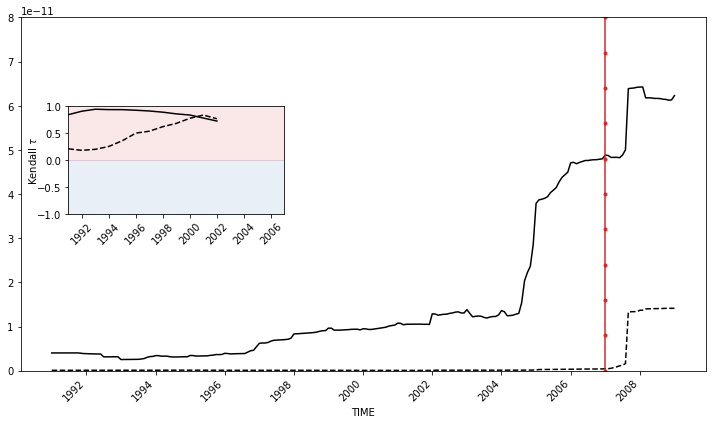

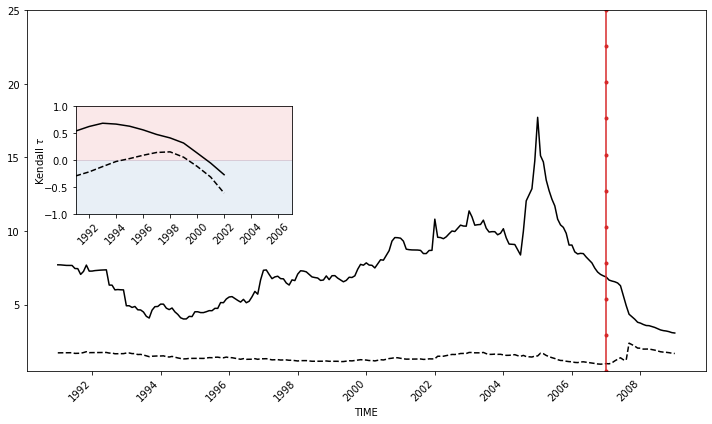

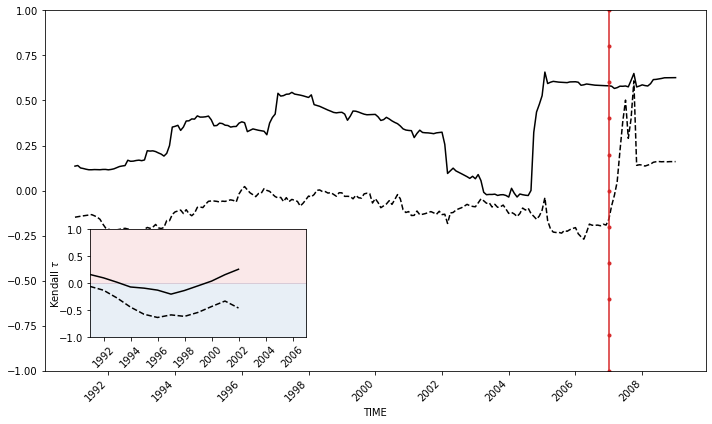

In [62]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
label_title = ['Variance', 'Coefficient of variation', 'Autocorrelation lag-1']
ymax = [0.8e-10, 25, 1.]
ymin = [0, 0.5, -1.
       ]
inset_locy = [0.495, 0.495, 0.21]
inset_locx = [0.1, 0.11, 0.13]

for istat, stat in enumerate(['variance', 'CoV', 'AC(1)']):
    fig, ax1 = plt.subplots(figsize = (10,6))
    gaussian_detrend[stat][(gaussian_detrend[stat]['TIME']>=1991) & 
                                     (gaussian_detrend[stat]['TIME']<=2009)].plot(ax=ax1, color='k',
                                                                                  x='TIME',
                                                                                  y='MISSISSIPPI',
                                                                                 linestyle = '--',
                                                                                 label = 'Gaussian',
                                                                                 legend =False)
    yrdy = spatial_detrend[stat][(spatial_detrend[stat]['TIME']>=1991) & 
                                 (spatial_detrend[stat]['TIME']<=2009)].plot(ax=ax1,
                                                                              x='TIME',
                                                                              y='MISSISSIPPI',color='k',
                                                                            label = 'Spatial',
                                                                            legend = False)
    ax1.plot(2007*np.ones(11), [ymin[istat] + ((ymax[istat]-ymin[istat])/10)*k for k in range(11)],
             '-',marker='.', c='tab:red', label = 'Outbreak year')
#     ax1.legend(fontsize = 13)
    ax1.set_ylim([ymin[istat],ymax[istat]])
    fig.autofmt_xdate(rotation=45)
    yrdy.xaxis.set_major_locator(MaxNLocator(integer=True))

    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [inset_locx[istat], inset_locy[istat], 0.3, 0.25]
    ax2 = fig.add_axes([left, bottom, width, height])
    ax2.set_ylim([-1,1])
    ax2.set_xlim([1991, 2007])
    # ax2.plot(range(6)[::-1], color='green')
    missi_df_gaussian.xs(stat, level = 0).plot(ax = ax2, y='MISSISSIPPI', color='k',linestyle = '--', legend =False)
    yy =missi_df_spatial.xs(stat, level = 0).plot(ax = ax2, y='MISSISSIPPI',color='k', linestyle = '-',legend = False)
    ax2.set_ylabel(r'Kendall $τ$', labelpad = -2)
    ax2.set_xlabel('')
    ax2.fill_between(range(1991, 2008
                          ), 1, 0, color='tab:red', alpha = 0.1)
    ax2.fill_between(range(1991, 2008
                      ), 0, -1, color='#2166ac', alpha = 0.1)
    yy.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.setp(  ax2.xaxis.get_majorticklabels(), rotation=45 )
    fig.tight_layout()
#     ax1.set_title(label_title[istat])
    fig.savefig('Missi_timeseries_kendall_tau' +stat+'.pdf')

# Monthly, bimonthly, 6 months, yearly, every 2, 3, 5 years

In [63]:
pertussis_monthly['BIMONTHLY'] = [np.ceil(x/2) for x in pertussis_monthly['MONTH']]
pertussis_monthly['QUARTER'] = [np.ceil(x/3) for x in pertussis_monthly['MONTH']]
pertussis_monthly['THIRD'] = [np.ceil(x/4) for x in pertussis_monthly['MONTH']]
pertussis_monthly['HALF'] = [np.ceil(x/6) for x in pertussis_monthly['MONTH']]
pertussis_monthly['BIYEARLY'] = [x + (x%2) for x in pertussis_monthly['YEAR']]
pertussis_monthly['TRIYEARLY'] = [x +3-(x%3) if (x%3!=0) else x for x in pertussis_monthly['YEAR']]
pertussis_monthly['FIVEYEARLY'] = [x +5-(x%5) if (x%5!=0) else x for x in pertussis_monthly['YEAR']]


In [64]:
def aggregate_data(df, groupby, window_detrend = 0.1, time_month = None):
    df_agg = df.groupby(groupby).sum().reset_index()
    if time_month is None:
        if len(groupby) == 1:
            df_agg['TIME'] = df_agg[groupby[0]]
        else:
            print(groupby)
    else:
        df_agg['TIME'] = df_agg[groupby[0]] + (df_agg[groupby[1]]-1)/time_month
    
    df_incidence = (df_agg.set_index(groupby[0])[states]/
                   census_yearly[states].loc[[x for x in census_yearly.index if x in df_agg[groupby[0]].values]]).reset_index()
    
    df_incidence['YEAR'] = df_agg[groupby[0]].astype(int)
    df_incidence['TIME'] = df_agg['TIME'].astype(float)
    df_incidence['sum_states'] = df_incidence[states].sum(axis=1, skipna =True)
    df_incidence['mean_states'] = df_incidence[states].mean(axis=1, skipna =True)
    
    spatial_detrend = df_incidence[states].subtract(df_incidence['mean_states'].values, axis='rows')
    spatial_detrend['TIME'] = df_incidence['TIME']
    spatial_detrend = spatial_detrend.groupby('TIME').mean()
    window_gaussian = int(df_incidence.shape[0]*window_detrend)
    
#     print('\n window size', window_gaussian)
    gaussian_detrend = df_incidence[states] - df_incidence[states].rolling(window = window_gaussian,
                                                                          win_type='gaussian',
                                                                          center = True).mean(std = np.mean(silvermans(df_agg[states].values)))
    gaussian_detrend['TIME'] = df_incidence['TIME']
    gaussian_detrend = gaussian_detrend.groupby('TIME').mean()
    
    return {'aggregated': df_agg,'incidence':df_incidence, 'spatial': spatial_detrend, 'gaussian': gaussian_detrend}

In [65]:
def ews(df, moving_av, gaussian_window, aggregation, time_agg = None):
    detrend_df = aggregate_data(df = df, 
                               groupby=aggregation,
                               window_detrend=gaussian_window,
                               time_month=time_agg)
    
    #mean incidence needed in CoV calc
    incidence_mean = detrend_df['incidence'].groupby('TIME').mean()
    
    window_size = int(detrend_df['aggregated'].shape[0]*moving_av)
#     print(window_size)
    spatial_ews = {}
    gaussian_ews = {}
    
    #variance
    var_spatial = (detrend_df['spatial']**2).rolling(window = window_size, 
                                                     min_periods=1,
                                                     center = False).mean()
    var_gaussian = (detrend_df['gaussian']**2).rolling(window = window_size,
                                                       min_periods=1,
                                                       center = False).mean()
    spatial_ews['Variance'] = var_spatial.reset_index()
    gaussian_ews['Variance'] = var_gaussian.reset_index()
    
    #CoV
    cv_spatial = (detrend_df['spatial']).rolling(window = window_size, 
                                                    min_periods=1,
                                                    center = False).std()/incidence_mean.rolling(window = window_size, 
                                                                                      min_periods=1,
                                                                                     center = False).mean()
    cv_gaussian = (detrend_df['gaussian']).rolling(window = window_size, 
                                                    min_periods=1,
                                                    center = False).std()/incidence_mean.rolling(window = window_size,
                                                                                                 min_periods=1,
                                                                                               center = False).mean()
    spatial_ews['CoV'] = cv_spatial.reset_index()
    gaussian_ews['CoV'] = cv_gaussian.reset_index()
    
    #AC(1)
    ac_1_spatial = detrend_df['spatial'].copy()
    for s in states:
        ac_1_spatial[s] = autocov(detrend_df['spatial'][s].shift(1), window_size)['corr'].to_frame()[0]
        
    ac_1_gaussian = detrend_df['gaussian'].copy()
    for s in states:
        ac_1_gaussian[s] = autocov(detrend_df['gaussian'][s].shift(1), window_size)['corr'].to_frame()[0]
        
    spatial_ews['AC(1)'] = ac_1_spatial.reset_index()
    gaussian_ews['AC(1)'] = ac_1_gaussian.reset_index()
    
    #kendall-tau scores
    gaussian_dict = kendall_tau_ews(ews_df=gaussian_ews, name='gaussian')
    spatial_dict = kendall_tau_ews(ews_df=spatial_ews, name='spatial')
    
    kendall_tau_scores = {}
    for stat in list(gaussian_dict.keys()):
        df_ktau = pd.concat([spatial_dict[stat], gaussian_dict[stat]])
        df_ktau = df_ktau.T
        df_ktau = df_ktau.reset_index()
        df_ktau['states'] = df_ktau['index']
        kendall_tau_scores[stat] = df_ktau
        
    return {'detrend_dict': detrend_df, 'spatial': spatial_ews, 'gaussian': gaussian_ews, 'kendalltau':kendall_tau_scores}

In [66]:
def kendall_tau_ews(ews_df, name):
    kendall_tau_stat = {}
    for stat in ['Variance','CoV', 'AC(1)']:
        ktau_state = {}
        for state in states:
            state_data = ews_df[stat]
            state_data = state_data[['TIME', state]]
            ktau_state[state] = state_data.loc[(state_data['TIME']>=1991) &
                                               (state_data['TIME']<2006)].corr(method = 'kendall').loc['TIME', state]

        kendall_tau_stat[stat] = pd.DataFrame(ktau_state, index = [name])
    return kendall_tau_stat


In [67]:
monthly = ews(df = pertussis_monthly,
    moving_av = 0.2,
    gaussian_window = 0.1,
    aggregation = ['YEAR', 'MONTH'],
    time_agg = 12)



biagg = ews(df = pertussis_monthly,
    moving_av = 0.2,
    gaussian_window = 0.1,
    aggregation = ['YEAR', 'BIMONTHLY'],
    time_agg = 6)


thirdagg = ews(df = pertussis_monthly,
    moving_av = 0.2,
    gaussian_window = 0.1,
    aggregation = ['YEAR', 'THIRD'],
    time_agg = 3)


quarterlyagg = ews(df = pertussis_monthly,
    moving_av = 0.2,
    gaussian_window = 0.1,
    aggregation = ['YEAR', 'QUARTER'],
    time_agg = 4)


halfagg = ews(df = pertussis_monthly,
    moving_av = 0.2,
    gaussian_window = 0.1,
    aggregation = ['YEAR', 'HALF'],
    time_agg = 2)

yearagg = ews(df = pertussis_monthly,
    moving_av = 0.2,
    gaussian_window = 0.1,
    aggregation = ['YEAR'],
    time_agg = None)

biyearagg = ews(df = pertussis_monthly,
    moving_av = 0.2,
    gaussian_window = 0.1,
    aggregation = ['BIYEARLY'],
    time_agg = None) 

threeyearagg = ews(df = pertussis_monthly,
    moving_av = 0.2,
    gaussian_window = 0.1,
    aggregation = ['TRIYEARLY'],
    time_agg = None)  

fiveyearagg = ews(df = pertussis_monthly,
    moving_av = 0.2,
    gaussian_window = 0.1,
    aggregation = ['FIVEYEARLY'],
    time_agg = None)   


In [68]:
import seaborn as sns
dataframes_agg = [monthly, biagg, quarterlyagg, thirdagg, halfagg, yearagg, biagg, threeyearagg, fiveyearagg]

agg_names = ['Monthly', 'Bi-monthly', 'Quarterly', 'Triannual',
                                      'Biannual', 'Yearly', 'Biennial', 'Triennial', 'Quinquennial']


ews_function_input = {}
ews_function_input[agg_names[0]] = [['YEAR', 'MONTH'], 12]
ews_function_input[agg_names[1]] = [['YEAR', 'BIMONTHLY'], 6]
ews_function_input[agg_names[2]] = [['YEAR', 'QUARTER'], 4] 
ews_function_input[agg_names[3]] = [['YEAR', 'THIRD'], 3]
ews_function_input[agg_names[4]] = [['YEAR', 'HALF'], 2]
ews_function_input[agg_names[5]] = [['YEAR'], None]
ews_function_input[agg_names[6]] = [['BIYEARLY'], None]
ews_function_input[agg_names[7]] = [['TRIYEARLY'], None]
ews_function_input[agg_names[8]] = [['FIVEYEARLY'], None]


In [69]:
window_sizes_test = np.arange(0.05, 0.8, 0.05)
low_incidence = ['LOUISIANA', 'MISSISSIPPI', 'GEORGIA', 'WEST VIRGINIA']
high_incidence = ['VERMONT', 'MASSACHUSETTS', 'IDAHO', 'NEW HAMPSHIRE']
high_col = ['#d7b5d8','#df65b0','#dd1c77','#980043']
low_col = ['#f0f9e8','#bae4bc','#7bccc4','#43a2ca','#0868ac']

In [ ]:
window_aggregation_spatial = {}
window_aggregation_gaussian = {}
test_loc = low_incidence[1]
print(test_loc)
for stat in (['Variance', 'CoV','AC(1)']):

    spatial_heatmap = np.zeros((len(window_sizes_test), len(agg_names)))
    gaussian_heatmap = np.zeros((len(window_sizes_test), len(agg_names)))
    for index_name, name in enumerate(agg_names):
        for index_av, moving_average_value in enumerate(window_sizes_test):
            
            aggregation_col = ews_function_input[name][0]
            group_time = ews_function_input[name][1]
            try:
                df_results = ews(df = pertussis_monthly,
                                moving_av = moving_average_value,
                                gaussian_window = 0.1,
                                aggregation =aggregation_col,
                                time_agg = group_time)


                dfstat = df_results['kendalltau'][stat]
                dfstat.to_csv((usr+
                               'data/kendall_tau_results_'+
                               name+
                               '_window_size_'+stat+'_'+test_loc+'1991_2005'+
                               str(moving_average_value).replace('.','_')+
                               '.csv'))
#                 dfstat = pd.read_csv((usr+
#                                'data/kendall_tau_results_'+
#                                name+
#                                '_window_size_'+stat+'_'+
#                                str(moving_average_value).replace('.','_')+
#                                '.csv'))
                spatial_heatmap[index_av, index_name] = dfstat[dfstat['states']==test_loc]['spatial'].values[0]
                gaussian_heatmap[index_av, index_name] = dfstat[dfstat['states']==test_loc]['gaussian'].values[0]
            except:
                spatial_heatmap[index_av, index_name] = np.nan
                gaussian_heatmap[index_av, index_name] = np.nan
    window_aggregation_spatial[stat] = spatial_heatmap
    window_aggregation_gaussian[stat] = gaussian_heatmap

In [ ]:
fig,ax = plt.subplots(3,2, figsize = (10, 15))
ax=ax.ravel()
index_stat = 0
for stat in (['Variance', 'CoV','AC(1)']):
        
    df_spatial = pd.DataFrame(window_aggregation_spatial[stat],
                              index=[str(round(frac*100))+'%' for frac in window_sizes_test ], 
                              columns=agg_names)
    df_spatial.index.rename('Window size (% of time series length)', inplace = True)
    mask = df_spatial.isnull()
    g = sns.heatmap(data = df_spatial, mask = mask,
                vmin =-1, vmax =1, cmap ='RdBu_r',ax=ax[index_stat], cbar_kws={'label': 'Kendall-tau score'})
    g.set_facecolor('lightgrey')
    ax[index_stat].set_title(stat + ' (spatial)')

    df_gaussian = pd.DataFrame(window_aggregation_gaussian[stat],
                              index=[str(round(frac*100))+'%' for frac in window_sizes_test ], 
                              columns=agg_names)
    df_gaussian.index.rename('Window size (% of time series length)', inplace = True)
    mask = df_gaussian.isnull()

    g = sns.heatmap(data =df_gaussian ,mask = mask,
                vmin =-1, vmax =1, cmap ='RdBu_r',ax=ax[index_stat+1],cbar_kws={'label': 'Kendall-tau score'})
    g.set_facecolor('lightgrey')
    ax[index_stat+1].set_title(stat +' (gaussian)')
    index_stat =index_stat +2
fig.tight_layout(pad=1.)
fig.savefig('low_risk_time_aggregation_choicewindow.pdf')

In [ ]:
window_aggregation_spatial_highr = {}
window_aggregation_gaussian_highr = {}

for stat in (['Variance', 'CoV','AC(1)']):
    test_loc = high_incidence[0]
    print(test_loc)
    spatial_heatmap = np.zeros((len(window_sizes_test), len(agg_names)))
    gaussian_heatmap = np.zeros((len(window_sizes_test), len(agg_names)))
    for index_name, name in enumerate(agg_names):
        for index_av, moving_average_value in enumerate(window_sizes_test):
            
            aggregation_col = ews_function_input[name][0]
            group_time = ews_function_input[name][1]
            try:
                df_results = ews(df = pertussis_monthly,
                                moving_av = moving_average_value,
                                gaussian_window = 0.1,
                                aggregation =aggregation_col,
                                time_agg = group_time)


                dfstat = df_results['kendalltau'][stat]
                dfstat.to_csv((usr+
                               'data/kendall_tau_results_high_risk_'+
                               name+
                               '_window_size_'+stat+'_'+test_loc+'1991_2005'+
                               str(moving_average_value).replace('.','_')+
                               '.csv'))
                spatial_heatmap[index_av, index_name] = dfstat[dfstat['states']==test_loc]['spatial'].values[0]
                gaussian_heatmap[index_av, index_name] = dfstat[dfstat['states']==test_loc]['gaussian'].values[0]
            except:
                spatial_heatmap[index_av, index_name] = np.nan
                gaussian_heatmap[index_av, index_name] = np.nan
    window_aggregation_spatial_highr[stat] = spatial_heatmap
    window_aggregation_gaussian_highr[stat] = gaussian_heatmap

In [ ]:
fig,ax = plt.subplots(3,2, figsize = (10, 15))
ax=ax.ravel()
index_stat = 0
for stat in (['Variance', 'CoV','AC(1)']):
        
    df_spatial = pd.DataFrame(window_aggregation_spatial_highr[stat],
                              index=[str(round(frac*100))+'%' for frac in window_sizes_test ], 
                              columns=agg_names)
    df_spatial.index.rename('Window size (% of time series length)', inplace = True)
    mask = df_spatial.isnull()
    g = sns.heatmap(data = df_spatial, mask = mask,
                vmin =-1, vmax =1, cmap ='RdBu_r',ax=ax[index_stat],cbar_kws={'label': 'Kendall-tau score'})
    g.set_facecolor('lightgrey')
    ax[index_stat].set_title(stat + ' (spatial)')

    df_gaussian = pd.DataFrame(window_aggregation_gaussian_highr[stat],
                              index=[str(round(frac*100))+'%' for frac in window_sizes_test ], 
                              columns=agg_names)
    df_gaussian.index.rename('Window size (% of time series length)', inplace = True)
    mask = df_gaussian.isnull()

    g = sns.heatmap(data =df_gaussian ,mask = mask,
                vmin =-1, vmax =1, cmap ='RdBu_r',ax=ax[index_stat+1],cbar_kws={'label': 'Kendall-tau score'})
    g.set_facecolor('lightgrey')
    ax[index_stat+1].set_title(stat +' (gaussian)')
    index_stat =index_stat +2
fig.tight_layout(pad=1.)
fig.savefig('high_risk_time_aggregation_choicewindow.pdf')